In [96]:
# 1. Считайте заданный набор данных из репозитария UCI.
import pandas as pd
massiv = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None)
massiv = massiv[(massiv.T != '?').all()]
target = massiv[1].astype(int)
massiv.drop([1],axis=1,inplace=True)

In [97]:
massiv

,0,2,3,4,5,6,7,8,9,10,...,270,271,272,273,274,275,276,277,278,279
2,54,172,95,138,163,386,185,102,96,34,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
8,44,168,56,84,118,354,160,63,61,69,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
29,51,160,83,96,147,400,301,82,-37,172,...,0.0,7.3,-3.9,0.0,0.0,0.5,-1.1,3.6,-6.3,2
56,38,160,63,79,0,376,165,0,34,14,...,0.0,10.1,0.0,0.0,0.0,0.0,1.5,26.2,37.0,1
71,37,182,90,101,294,356,164,143,33,19,...,0.0,6.9,0.0,0.0,0.0,0.2,1.9,22.0,38.3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,35,160,53,55,163,340,162,102,40,35,...,0.0,8.7,-0.5,0.0,0.0,0.5,2.3,20.9,40.6,1
430,11,138,29,123,145,361,221,80,112,-17,...,-3.4,19.6,-4.2,0.0,0.0,0.2,1.8,12.2,25.1,10
440,37,176,72,88,153,389,172,89,67,48,...,-0.9,16.6,-3.4,0.0,0.0,0.7,1.8,24.9,41.4,1
449,36,166,68,108,176,365,194,116,-85,-19,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2


In [98]:
# 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Оставьте в наборе данных только числовые признаки.
massiv.isnull().sum().value_counts()

0    279
dtype: int64

In [99]:
massiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 2 to 450
Columns: 279 entries, 0 to 279
dtypes: float64(120), int64(154), object(5)
memory usage: 148.8+ KB


In [100]:
massiv.select_dtypes('object')

,10,11,12,13,14
2,34,70,66,23,75
8,69,78,66,84,64
29,172,-5,-67,160,71
56,14,55,26,-93,70
71,19,34,26,154,69
...,...,...,...,...,...
426,35,69,37,-84,81
430,-17,14,51,-44,93
440,48,58,58,-90,55
449,-19,-61,-70,84,84


In [101]:
massiv = massiv.astype(float)
massiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 2 to 450
Columns: 279 entries, 0 to 279
dtypes: float64(279)
memory usage: 148.8 KB


In [102]:
# 3. Вычислите и визуализируйте матрицу корреляций признаков. Удалите из набора признаки, имеющие высокую корреляцию (близкую к +1 или -1) с другими признаками

import pandas as pd
import numpy as np

def find_correlation(data, threshold=0.9, remove_negative=False):
    """
    Given a numeric pd.DataFrame, this will find highly correlated features,
    and return a list of features to remove.
    Parameters
    -----------
    data : pandas DataFrame
        DataFrame
    threshold : float
        correlation threshold, will remove one of pairs of features with a
        correlation greater than this value.
    remove_negative: Boolean
        If true then features which are highly negatively correlated will
        also be returned for removal.
    Returns
    --------
    select_flat : list
        listof column names to be removed
    """
    corr_mat = data.corr()
    if remove_negative:
        corr_mat = np.abs(corr_mat)
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][corr_mat[col] > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

massiv.drop(find_correlation(massiv),inplace=True,axis=1)

In [103]:
massiv

,0,2,3,4,5,6,7,8,9,10,...,270,271,272,273,274,275,276,277,278,279
2,54.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,34.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
8,44.0,168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,69.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1.0
29,51.0,160.0,83.0,96.0,147.0,400.0,301.0,82.0,-37.0,172.0,...,0.0,7.3,-3.9,0.0,0.0,0.5,-1.1,3.6,-6.3,2.0
56,38.0,160.0,63.0,79.0,0.0,376.0,165.0,0.0,34.0,14.0,...,0.0,10.1,0.0,0.0,0.0,0.0,1.5,26.2,37.0,1.0
71,37.0,182.0,90.0,101.0,294.0,356.0,164.0,143.0,33.0,19.0,...,0.0,6.9,0.0,0.0,0.0,0.2,1.9,22.0,38.3,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,35.0,160.0,53.0,55.0,163.0,340.0,162.0,102.0,40.0,35.0,...,0.0,8.7,-0.5,0.0,0.0,0.5,2.3,20.9,40.6,1.0
430,11.0,138.0,29.0,123.0,145.0,361.0,221.0,80.0,112.0,-17.0,...,-3.4,19.6,-4.2,0.0,0.0,0.2,1.8,12.2,25.1,10.0
440,37.0,176.0,72.0,88.0,153.0,389.0,172.0,89.0,67.0,48.0,...,-0.9,16.6,-3.4,0.0,0.0,0.7,1.8,24.9,41.4,1.0
449,36.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,-19.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2.0


In [104]:
# 4. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.
target.unique()

array([0, 1])

In [105]:
# 5. Используя метод рекурсивного исключения признаков (RFE) и логистическую регрессию, определите и оставьте в наборе наиболее значимые признаки (не менее двух). Если в наборе данных осталось более двух признаков, то определите два признака с наибольшей дисперсией для визуализации
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(massiv, target)

print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
print("Ранг признаков: %s" % fit.ranking_)

Число признаков: 126
Выбранные признаки: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True False  True  True False  True False False False False False
 False  True  True  True False False False False False  True False  True
  True  True False  True False  True False False False False  True  True
 False False  True False False False False False False  True False False
  True False False False False False False  True  True False  True  True
  True  True  True False False False False  True False  True  True  True
 False False False False  True  True False  True False False False False
 False False False  True  True False  True False False False False False
  True  True  True  True  True False False False False False False False
  True  True  True False  True False False False False False False  True
  True  True False False  True False False False False False False False
  True False False False  True  True  True  True False False False False
 False  Tr

In [106]:
massiv.drop(massiv.columns[np.where(fit.support_ == False)[0]], axis=1, inplace=True)

In [107]:
massiv.var().argmax()

11

In [108]:
massiv.drop([11],axis=1).var().argmax()

10

In [110]:
massiv = massiv[[10,11]]

In [111]:
# 6. Масштабируйте признаки набора данных на интервал от 0 до 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(massiv)

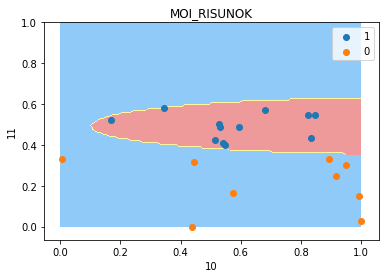

In [123]:
# 7. Используя разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%, создайте и обучите классификаторы на основе наивного байесовского классификатора, логистической регрессии, линейного дискриминантного анализа и метода опорных векторов.

# 8. Визуализируйте для каждого из классификаторов границу решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных.

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(rescaledX, target.values,test_size=test_size, random_state=666)

from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train,y_train);
y_nbc = nbc.predict(X_test)

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
 

plot_decision_boundary(nbc, axis=[0, 1, 0, 1])
plt.title('MOI_RISUNOK')
plt.xlabel('10')
plt.ylabel('11')
plt.scatter(X_test[y_nbc==0,0], X_test[y_nbc==0,1],label='1')
plt.scatter(X_test[y_nbc==1,0], X_test[y_nbc==1,1],label='0')
plt.legend()
plt.show()

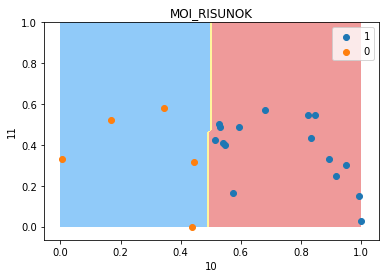

In [127]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train);
y_log_reg = log_reg.predict(X_test)
plot_decision_boundary(log_reg, axis=[0, 1, 0, 1])
plt.title('MOI_RISUNOK')
plt.xlabel('10')
plt.ylabel('11')
plt.scatter(X_test[y_log_reg==0,0], X_test[y_log_reg==0,1],label='1')
plt.scatter(X_test[y_log_reg==1,0], X_test[y_log_reg==1,1],label='0')
plt.legend()
plt.show()

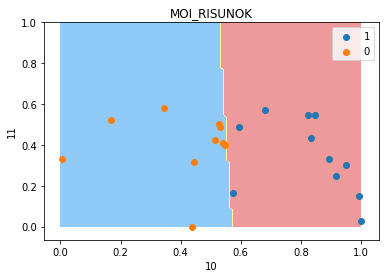

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train);
y_lda = lda.predict(X_test)
plot_decision_boundary(lda, axis=[0, 1, 0, 1])
plt.title('MOI_RISUNOK')
plt.xlabel('10')
plt.ylabel('11')
plt.scatter(X_test[y_lda==0,0], X_test[y_lda==0,1],label='1')
plt.scatter(X_test[y_lda==1,0], X_test[y_lda==1,1],label='0')
plt.legend()
plt.show()

In [132]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

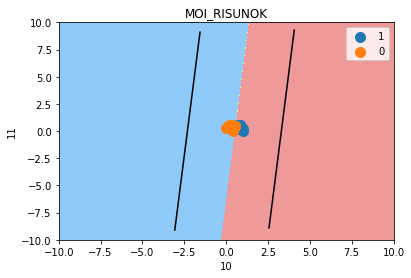

In [135]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train,y_train);
y_svc = svc.predict(X_test)
plot_svc_decision_boundary(svc, axis=[-10, 10, -10, 10])
plt.title('MOI_RISUNOK')
plt.xlabel('10')
plt.ylabel('11')
plt.scatter(X_test[y_svc==0,0], X_test[y_svc==0,1],label='1',s=100)
plt.scatter(X_test[y_svc==1,0], X_test[y_svc==1,1],label='0',s=100)
plt.legend()
plt.show()

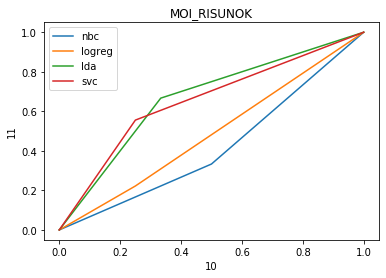

In [145]:
# 9. Визуализируйте на одном рисунке ROC кривые для каждого из классификаторов, подписывая оси и рисунок и создавая легенду для методов бинарной классификации.
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, y_nbc)
plt.plot(fprs, tprs,label='nbc')
fprs, tprs, thresholds = roc_curve(y_test, y_log_reg)
plt.plot(fprs, tprs,label='logreg')
fprs, tprs, thresholds = roc_curve(y_test, y_lda)
plt.plot(fprs, tprs,label='lda')
fprs, tprs, thresholds = roc_curve(y_test, y_svc)
plt.plot(fprs, tprs,label='svc')
plt.title('MOI_RISUNOK')
plt.xlabel('10')
plt.ylabel('11')
plt.legend()

In [6]:
# 10. Определите лучший метод бинарной классификации набора данных по показателю ROC_AUC (площади под ROC кривой).

In [146]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_nbc),roc_auc_score(y_test, y_log_reg),roc_auc_score(y_test, y_lda),roc_auc_score(y_test, y_svc)

(0.41666666666666663,
 0.48611111111111116,
 0.6666666666666667,
 0.6527777777777778)